In [1]:
import sys
sys.path.insert(0, "/home/pidoux/MASTER/ML/projet/Projet/Module")

from Loss import *
from Linear import *
from mltools import *
import matplotlib.pyplot as plt
import random
import numpy as np

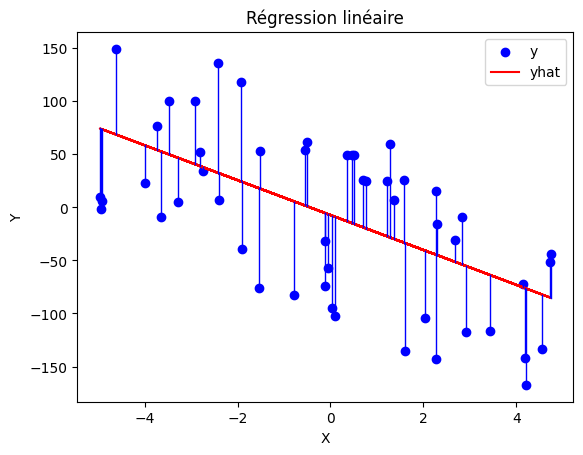

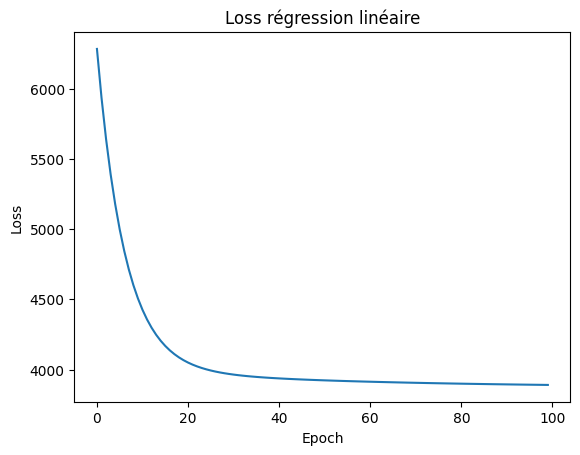

In [8]:
# créer le jeu de donnée
a= -20
b=-10
x= np.random.uniform(-5,5,50).reshape((-1,1))
y = a * x + b +( np.random.uniform(-100,100,50).reshape((-1,1)))

# initialisation des paramètres du réseau
d = x.shape[1]
d_prime = 1
epoch = 100
gradient_step = 1e-4
loss = MSELoss()
lin = Linear(d, d_prime)

# Apprentissage 
losses = []
for _ in range(epoch):
    #forward
    hidden_l = lin.forward(x)
    #backward
    losses.append(loss.forward(y, hidden_l).mean())
    loss_backward = loss.backward(y, hidden_l)
    delta_linear = lin.backward_delta(x, loss_backward)
    lin.backward_update_gradient(x, loss_backward)
    # mise à jour des paramètres
    lin.update_parameters(gradient_step=gradient_step)
    lin.zero_grad()

yhat = lin.forward(x)

plt.figure()
plt.scatter(x,y,label="y",color='blue')
plt.plot(x,yhat,label='yhat',color='red',)

for i in range(len(x)):
    plt.plot([x[i],x[i]],[y[i], yhat[i]], c="blue", linewidth=1)
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Régression linéaire")
plt.show()

plt.figure()
plt.plot(np.arange(epoch),losses)
plt.title("Loss régression linéaire")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


Accuracy :  0.97


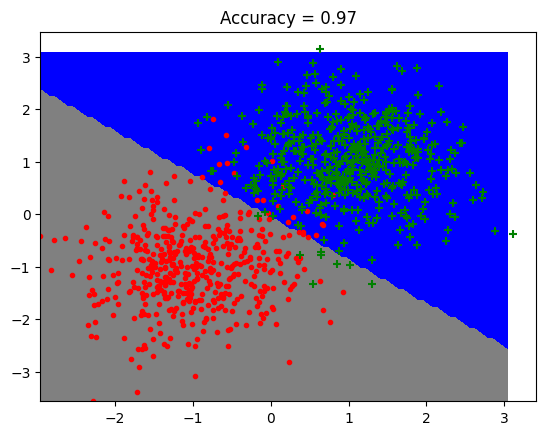

In [6]:
# creer jeu de données
X_train, y_train = gen_arti(centerx=1, centery=1, sigma=0.5, nbex=1000, data_type=0, epsilon=0.2)
X_test, y_test = gen_arti(centerx=1, centery=1, sigma=0.5, nbex=1000, data_type=0, epsilon=0.2)
y_train = np.where(y_train==-1,0,1).reshape((-1,1))
y_test = np.where(y_test==-1,0,1).reshape((-1,1))
d = X_train.shape[1]
d_prime = 1
# paramètres du modèle
epoch = 1000
gradient_step = 1e-4
loss = MSELoss()
lin = Linear(d, d_prime)
losses = []
# apprentissage
for i in range(epoch):
    #forward
    forward = lin.forward(X_train)
    #backward
    losses.append(loss.forward(y, hidden_l).mean())
    loss_back = loss.backward(y_train, forward)
    delta = lin.backward_delta(X_train, loss_back)
    lin.backward_update_gradient(X_train, loss_back)
    #Mise à jour des paramètres
    lin.update_parameters(gradient_step=gradient_step)
    lin.zero_grad()


def predict(x):
    forward = lin.forward(x)
    return np.where(forward >= 0.5,1, 0)


acc = np.where(y_test == predict(X_test),1,0).mean()
print("Accuracy : ",acc)
plt.figure()
plot_frontiere(X_test, predict, step=100)
plot_data(X_test, y_test.reshape(-1))
plt.title("Accuracy = "+str(acc))
plt.show()